In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Column names for the dataset
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the dataset
df= pd.read_csv(url, delim_whitespace=True, names=columns)

# Display the first few rows of the dataset
print(df.head())



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
target=pd.read_csv("Target_boston.csv",index_col=False)
df=df.drop(columns="MEDV",axis=1)

In [4]:
target=target.drop(columns="Unnamed: 0",axis=1)

In [5]:
df["Price"]=target

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 1000x800 with 0 Axes>

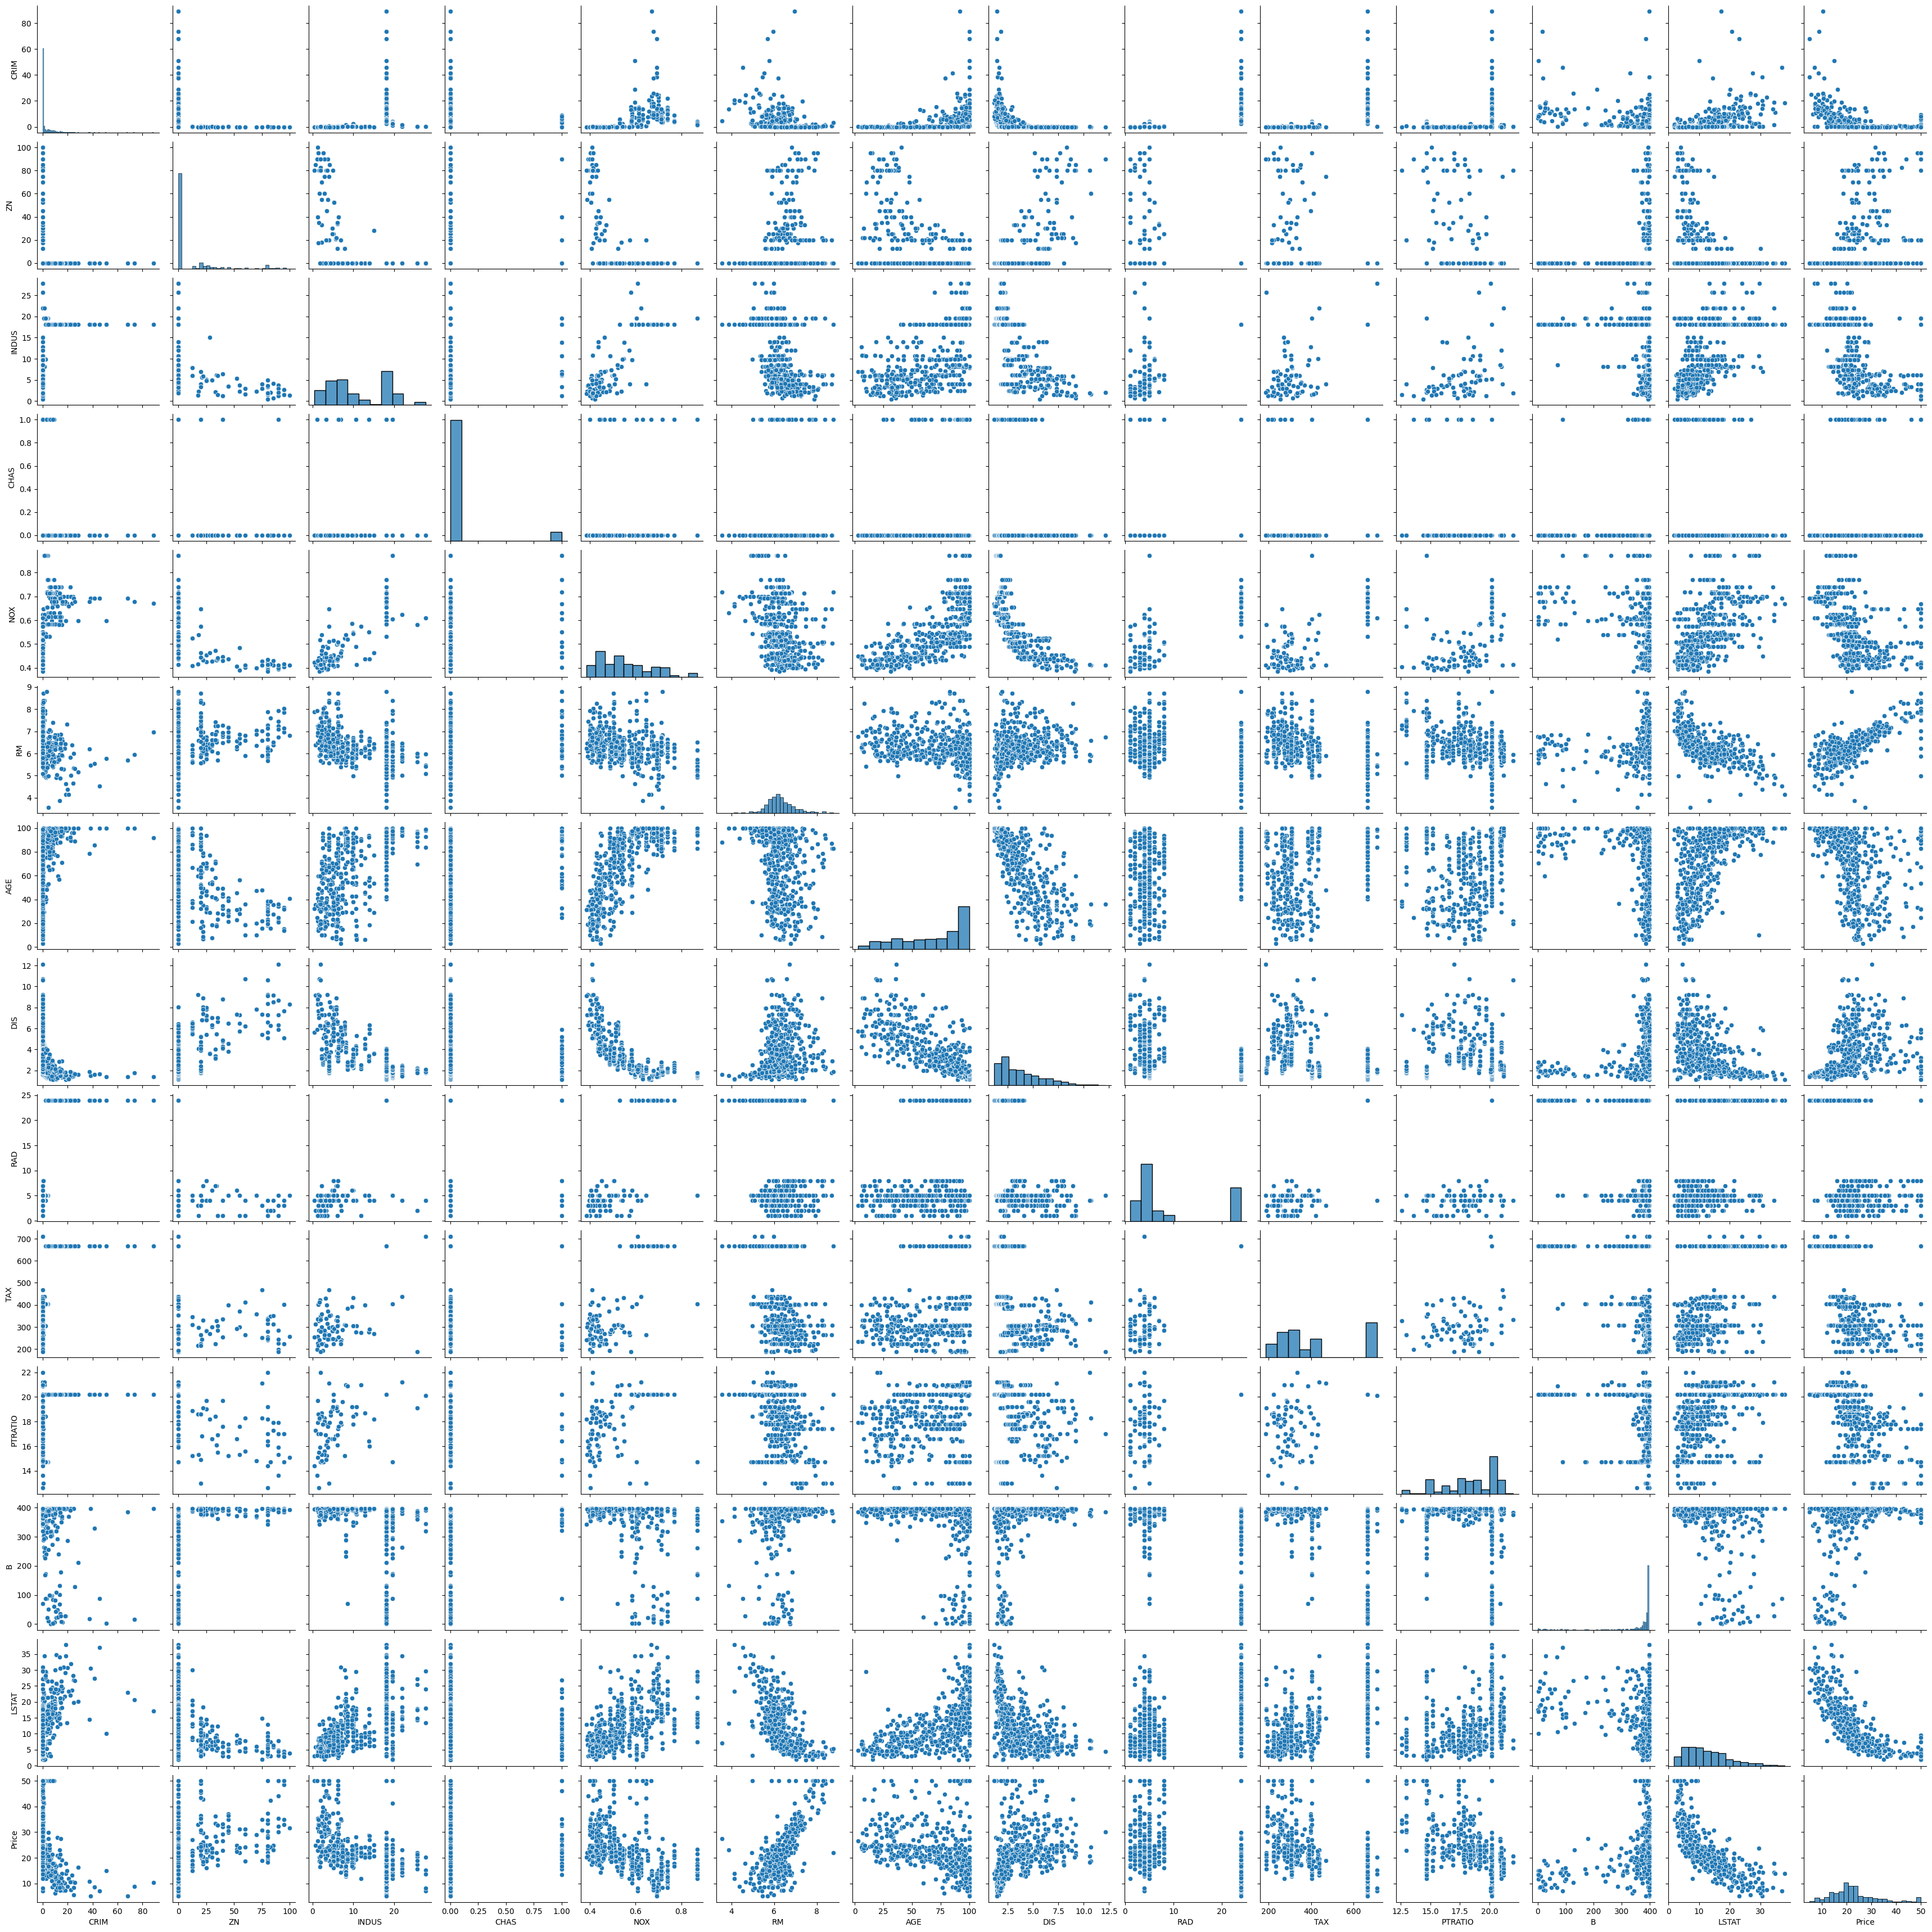

In [9]:
plt.figure(figsize=(10,8))
sns.pairplot(df)

<Axes: >

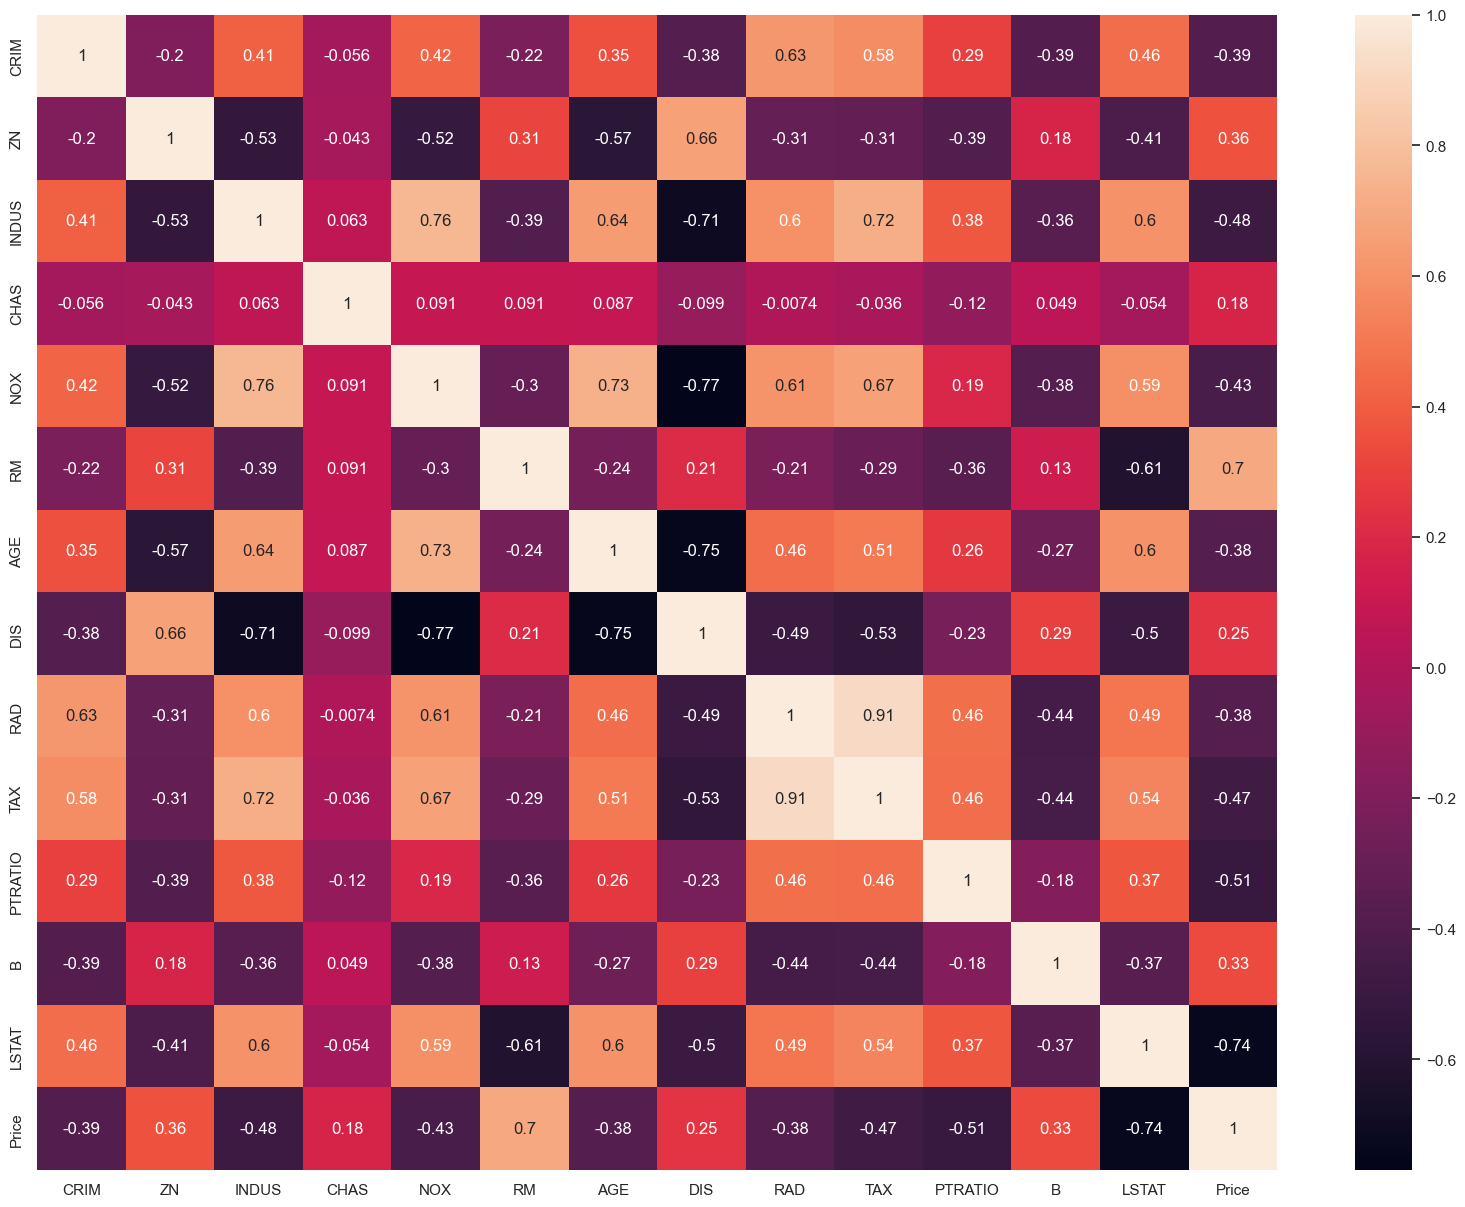

In [10]:
sns.set(rc={"figure.figsize" :(20,15)})
sns.heatmap(df.corr(),annot=True)

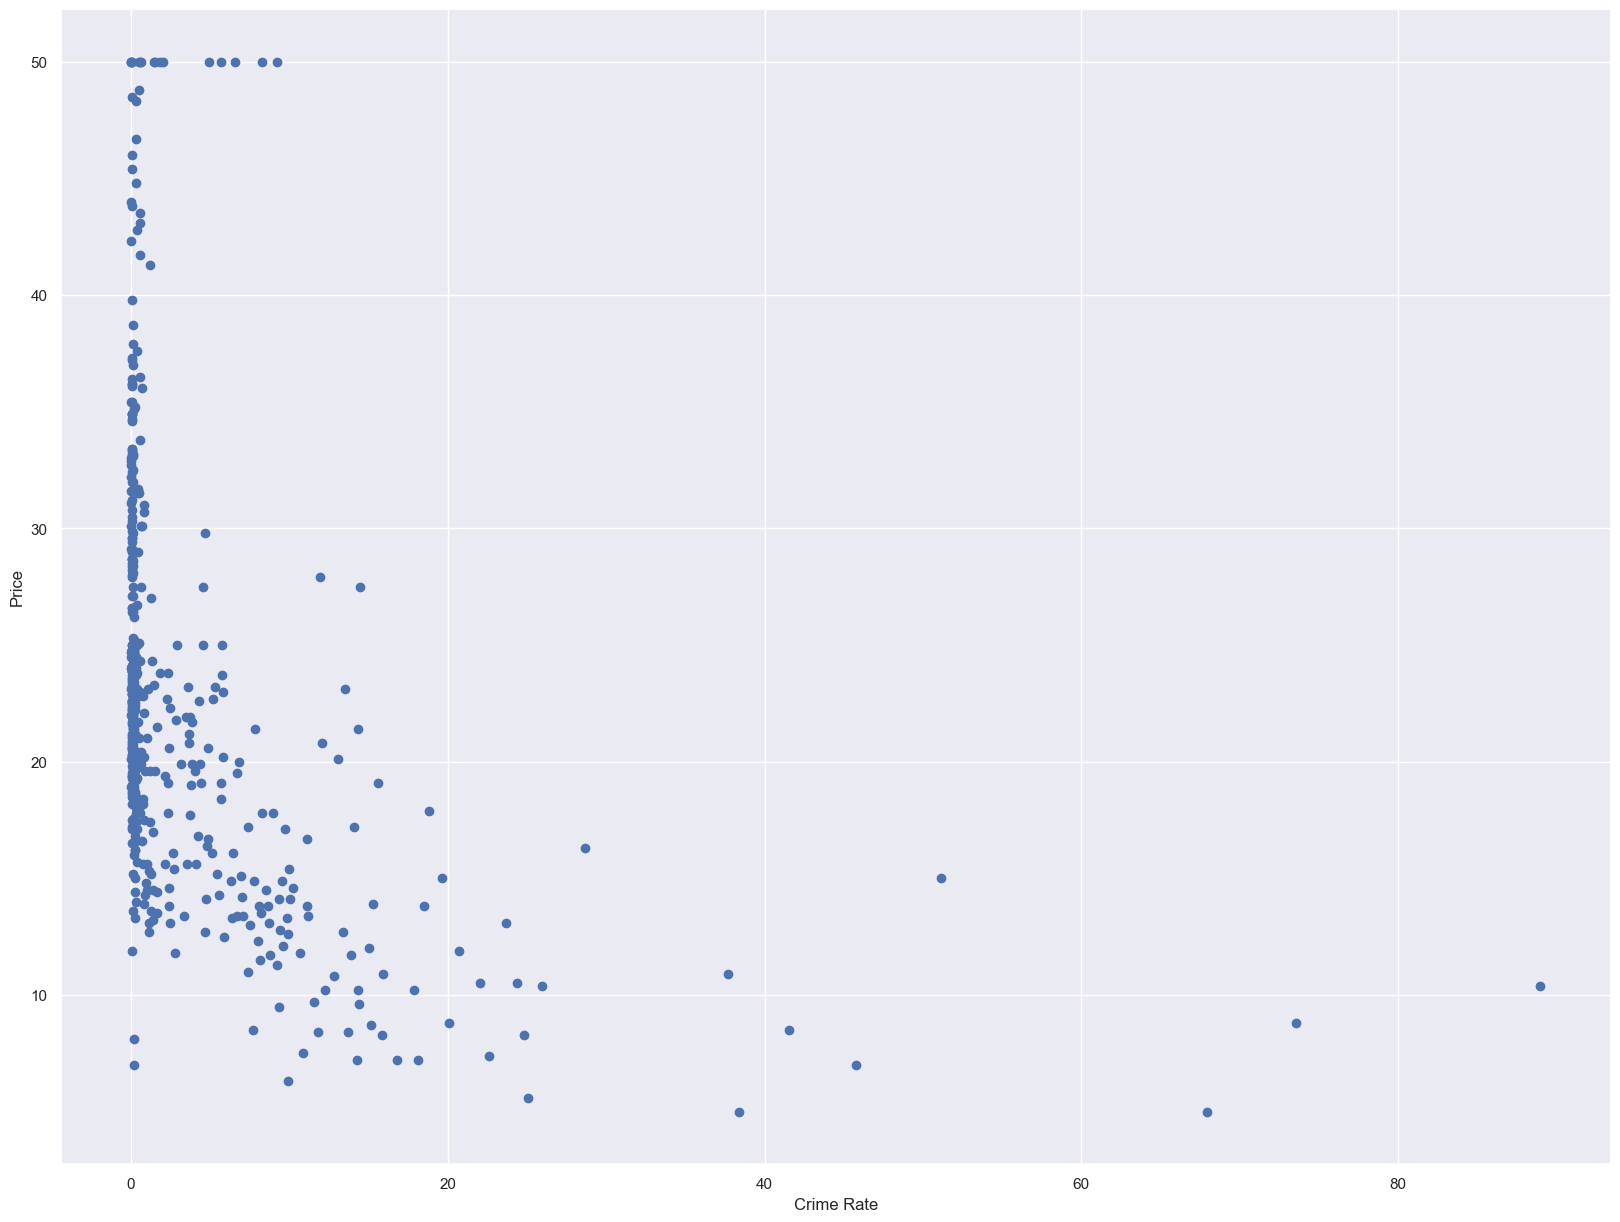

In [11]:
plt.scatter(df["CRIM"],df["Price"])
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.show()


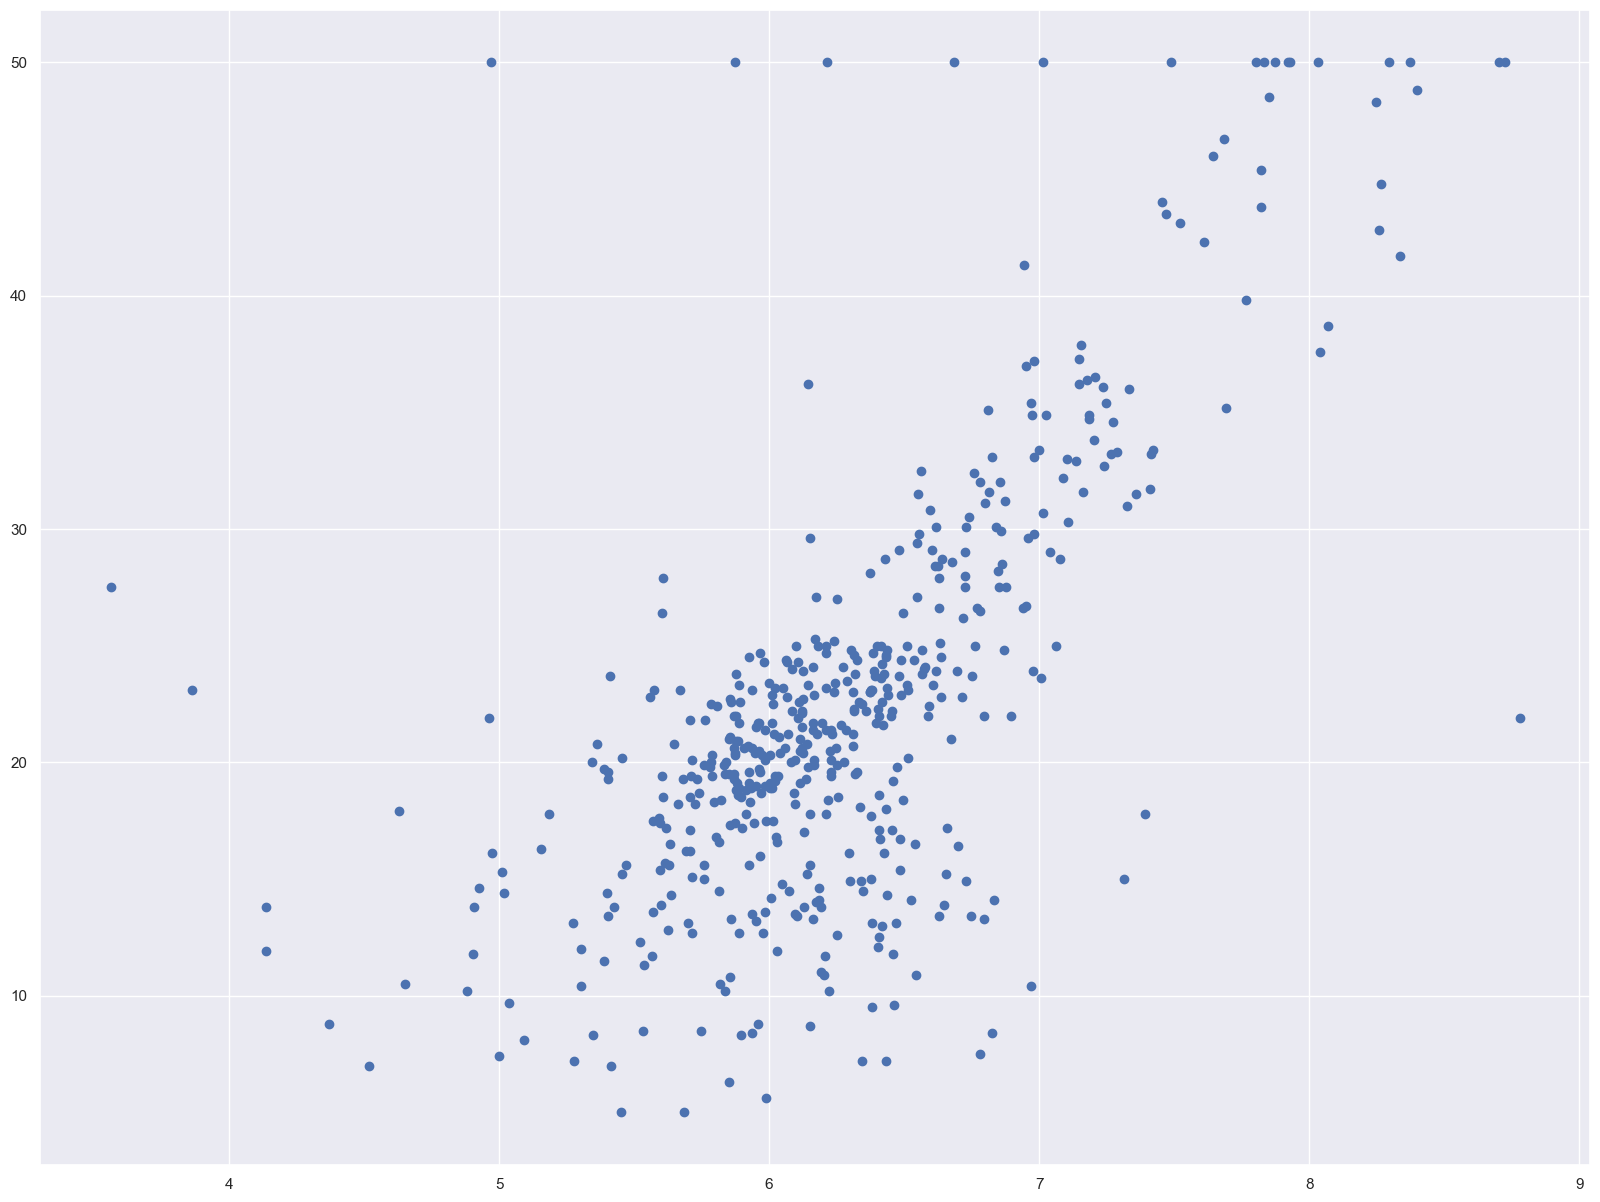

In [12]:
plt.scatter(df["RM"],df["Price"])

<Axes: xlabel='RM', ylabel='Price'>

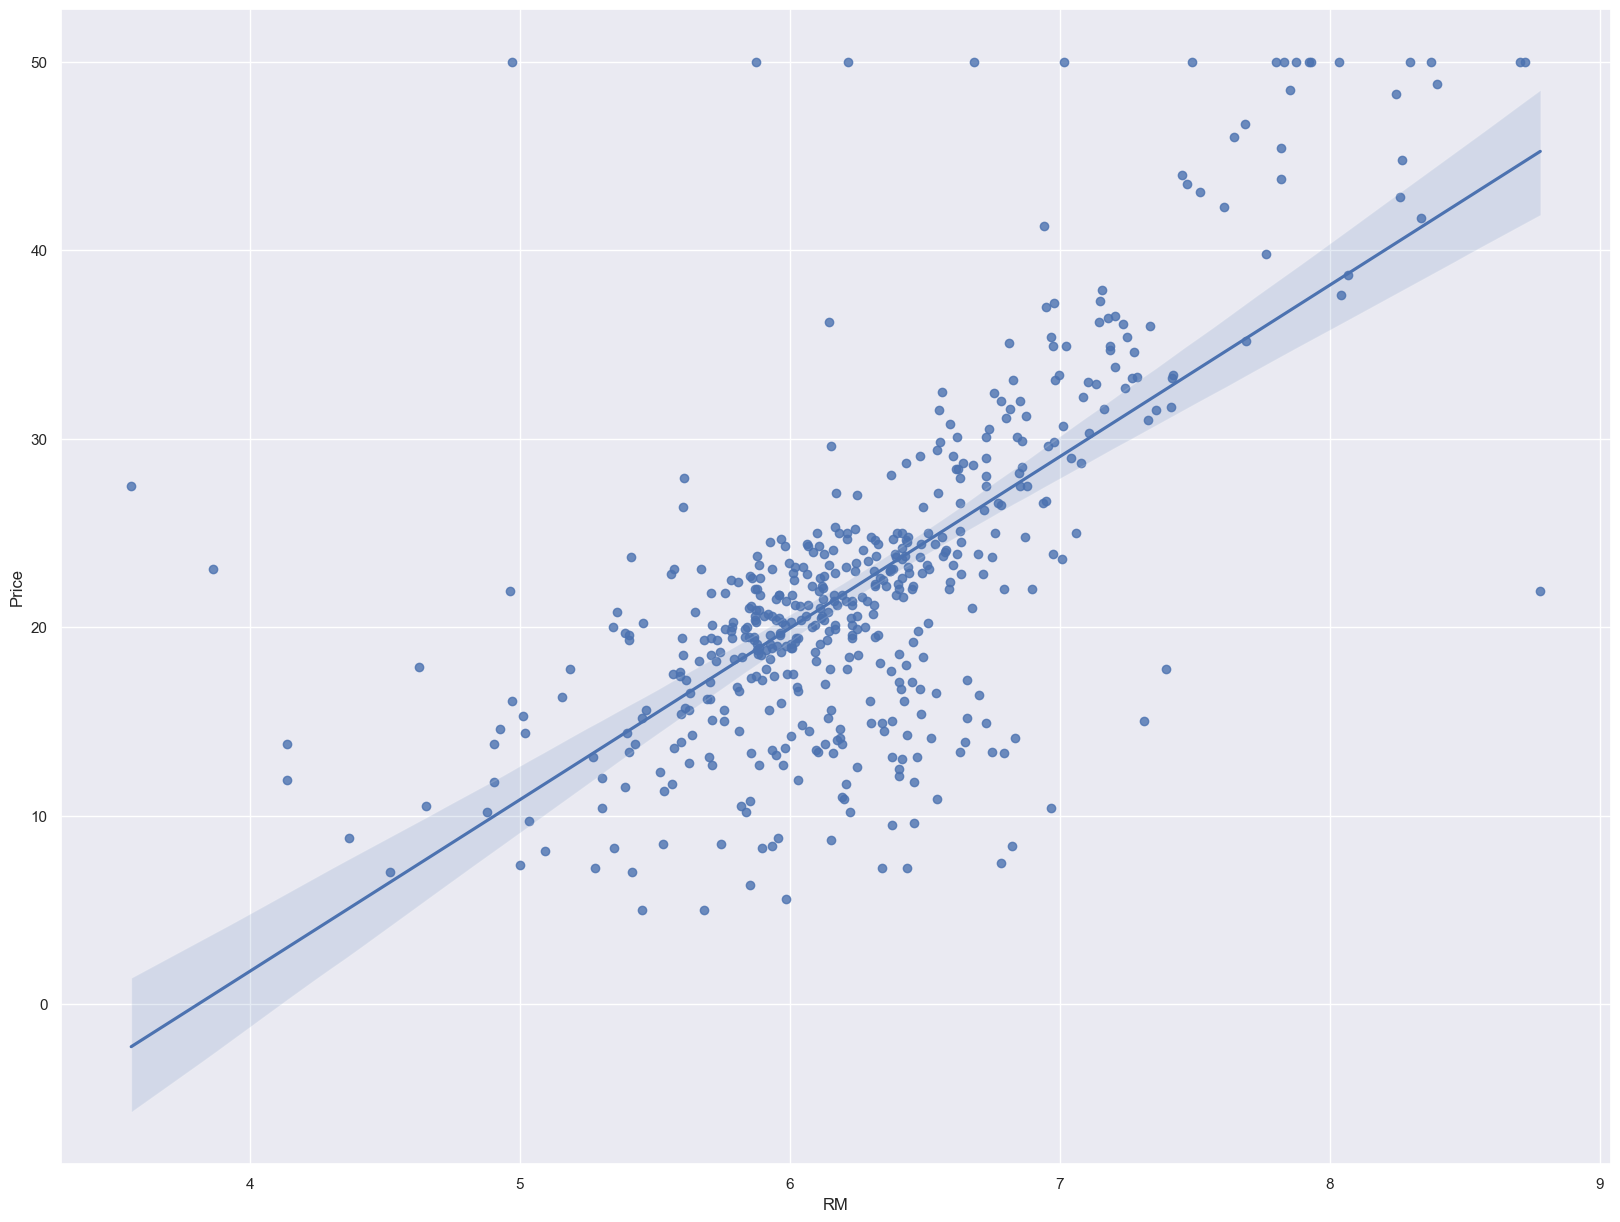

In [13]:
sns.regplot(x="RM" ,y="Price" , data=df) #Linear Regression Best fit Line 

<Axes: xlabel='LSTAT', ylabel='Price'>

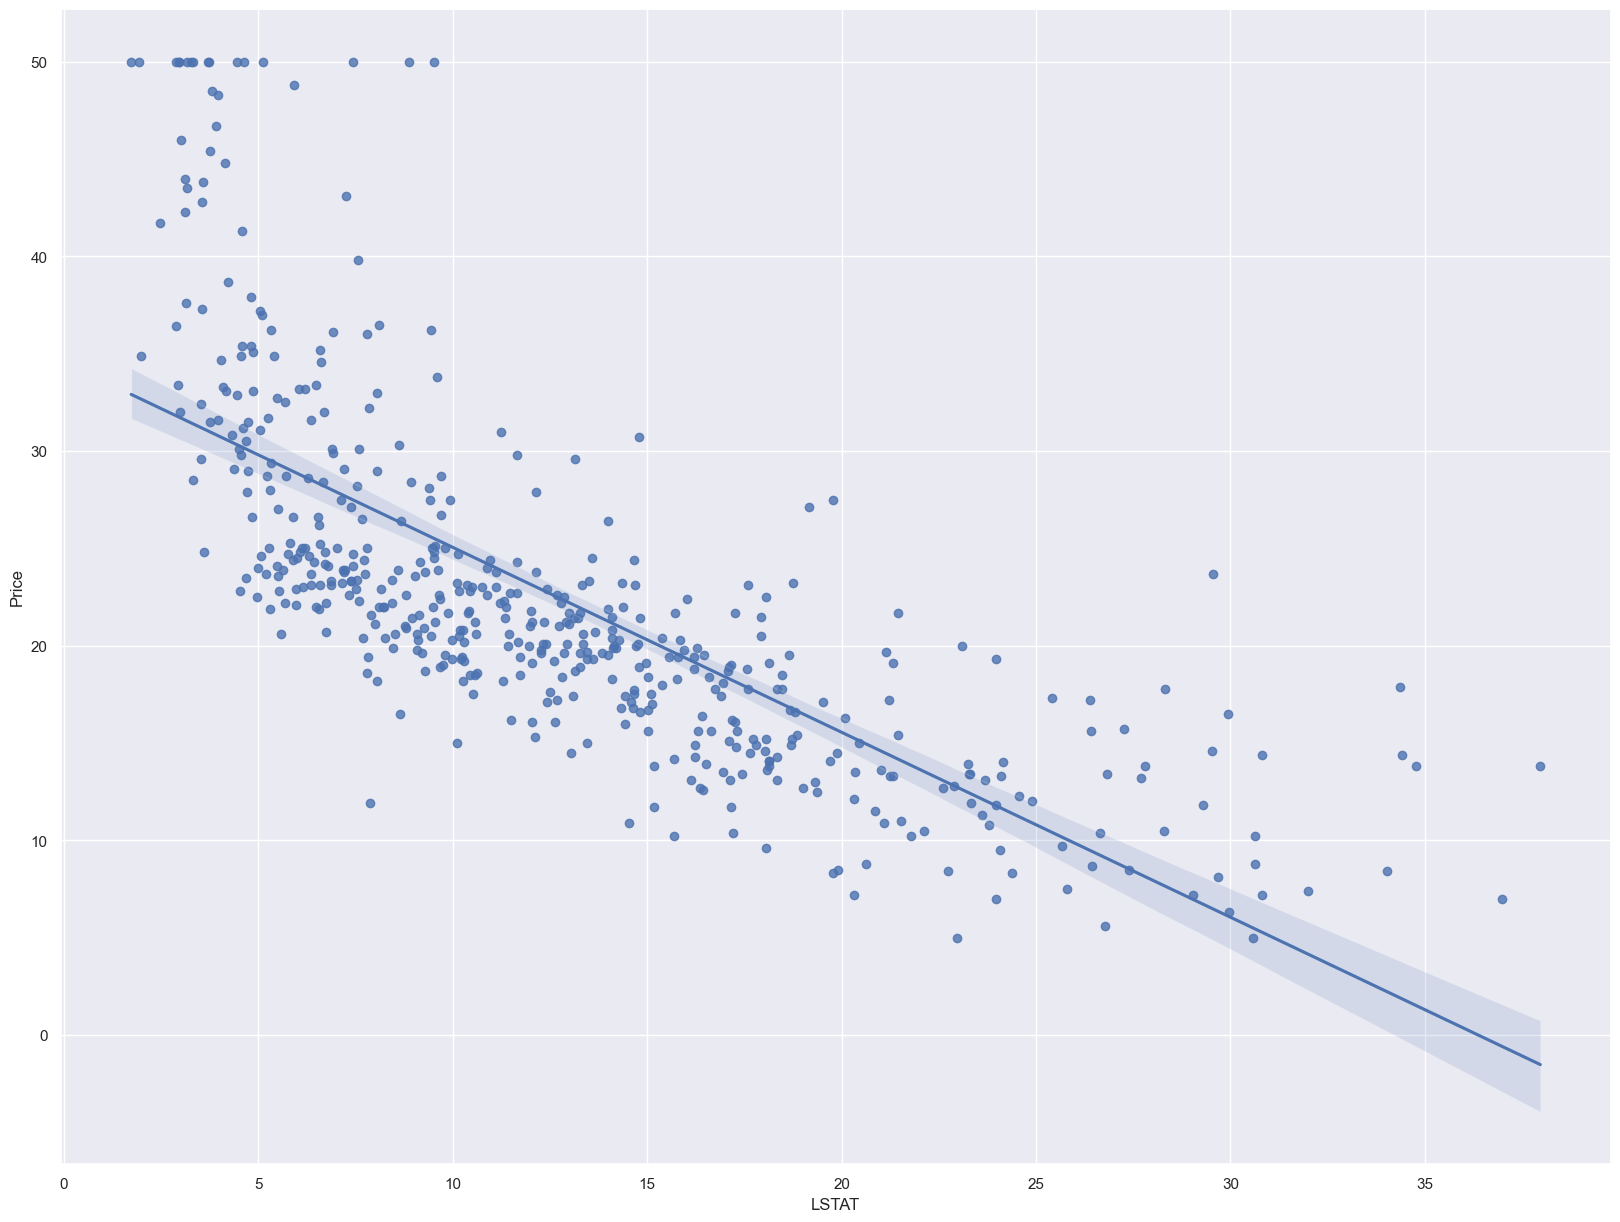

In [14]:
sns.regplot(x="LSTAT", y="Price" , data=df)

<Axes: xlabel='Price'>

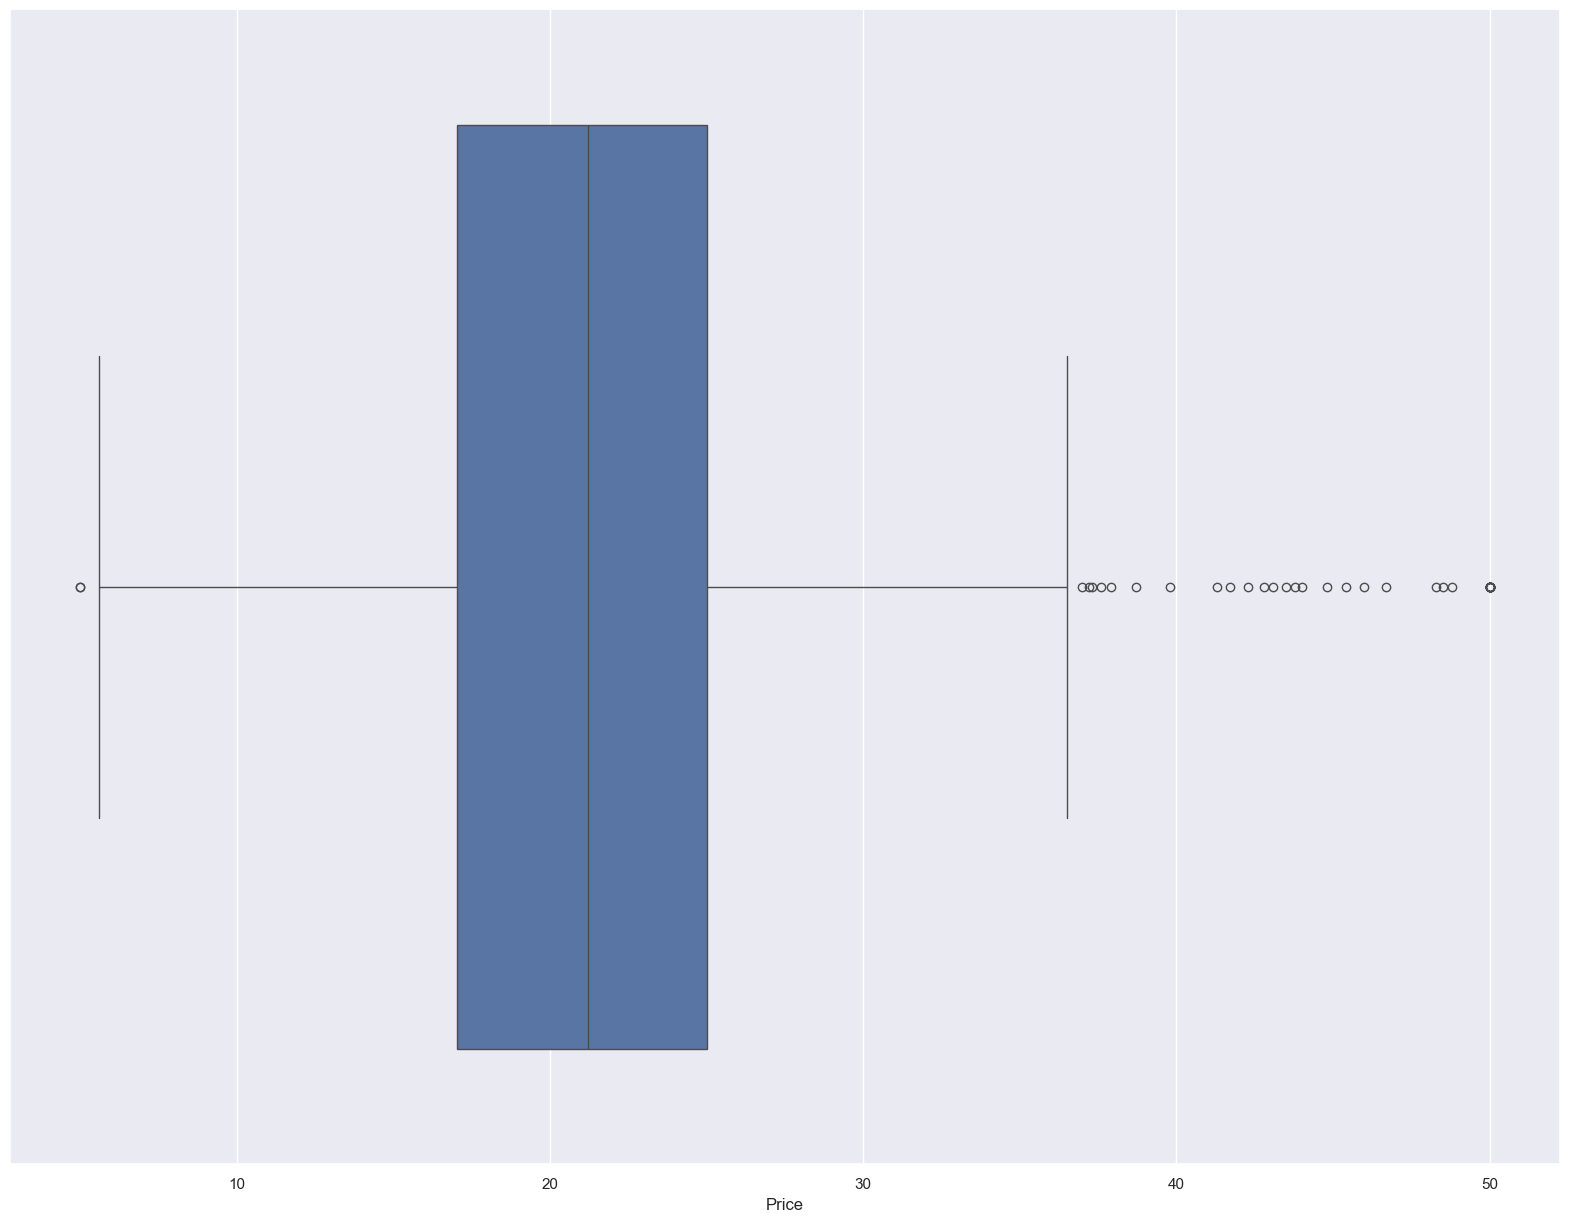

In [15]:
sns.boxplot(x=df["Price"]) # There is an Outliers but this is an Dependent Feature.

In [16]:
##Independent Feature And Dependent Feature
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train , x_test , y_train , y_test =train_test_split(x , y , test_size=0.33 ,random_state=10)

In [21]:
print("x_train =",x_train.shape)
print("y_train = ",y_train.shape)   #both x and y shape are same in training data
print("x_test =" , x_test.shape)
print("y_test =" , y_test.shape)    #both x and y shape are same in test data

x_train = (339, 13)
y_train =  (339,)
x_test = (167, 13)
y_test = (167,)


In [22]:
#Standardization or feature scaling Dataset
from sklearn .preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
x_train=scaler.fit_transform(x_train)

In [25]:
x_test=scaler.transform(x_test)

In [26]:
#Model Training
from sklearn.linear_model import LinearRegression

In [27]:
regression=LinearRegression()

In [28]:
regression.fit(x_train,y_train)

LinearRegression()

In [29]:
#print coefficient and Intercept
print("Coefficient =",regression.coef_)


Coefficient = [-1.29099218  1.60949999 -0.14031574  0.37201867 -1.76205329  2.22752218
  0.32268871 -3.31184248  2.70288107 -2.09005699 -1.7609799   1.25191514
 -3.83392028]


In [30]:
print("Intercept =",regression.intercept_)

Intercept = 22.077286135693214


In [31]:
x_train.shape

(339, 13)

In [33]:
reg_predict=regression.predict(x_test)

In [86]:
reg_predict

array([31.43849583, 31.98794389, 30.99895559, 22.31396689, 18.89492791,
       16.21371128, 35.9881236 , 14.81264582, 25.04500847, 37.12806894,
       21.49110158, 30.88757187, 28.05752881, 34.05600093, 33.75791114,
       40.63880011, 24.24023412, 23.41351375, 25.54158122, 21.34135664,
       32.71699711, 17.88341061, 25.49549436, 25.01006418, 32.54102925,
       20.48979076, 19.48816948, 16.92733183, 38.38530857,  0.36265208,
       32.42715816, 32.15306983, 26.10323665, 23.79611814, 20.67497128,
       19.69393973,  3.50784614, 35.26259797, 27.04725425, 27.66164435,
       34.35132103, 29.83057837, 18.40939436, 31.56953795, 17.91877807,
       28.50042742, 19.49382421, 21.69553078, 38.0954563 , 16.44490081,
       24.58507284, 19.67889486, 24.53954813, 34.30610423, 26.74699088,
       34.87803562, 21.06219662, 19.87980936, 18.68725139, 24.71786624,
       19.96344041, 23.56002479, 39.57630226, 42.81994338, 30.37060855,
       17.03737245, 23.83719412,  3.2425022 , 31.5046382 , 28.63

# ***Assumption of Linear Regression Data***
#Homoscedasticity

Text(0, 0.5, 'Predicted Data')

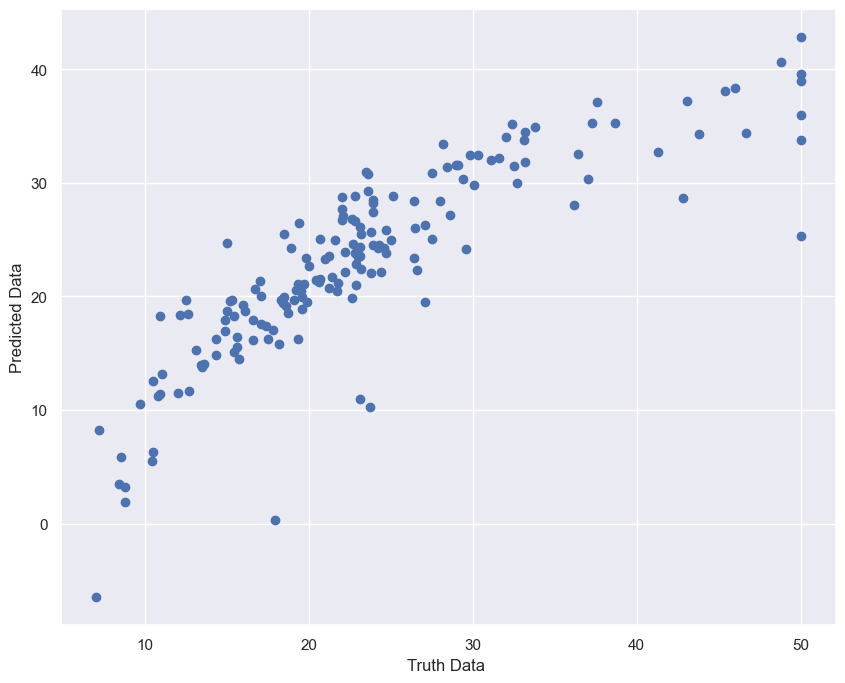

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,reg_predict)
plt.xlabel("Truth Data ")
plt.ylabel("Predicted Data")


In [42]:
Residuals=y_test - reg_predict

In [43]:
Residuals

305   -3.038496
193   -0.887944
65    -7.498956
349    4.286033
151    0.705072
         ...   
442   -1.004380
451   -4.387684
188   -2.638009
76    -2.661709
314   -1.885761
Name: Price, Length: 167, dtype: float64

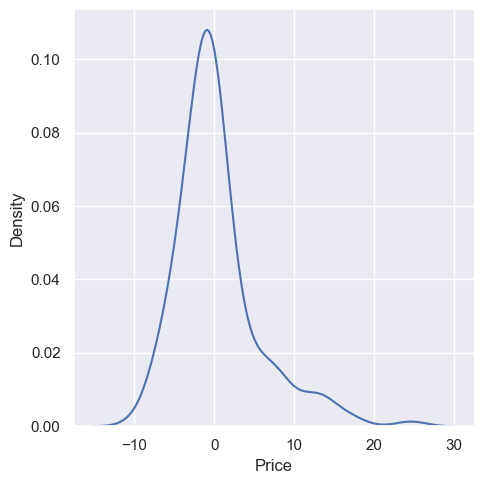

In [46]:
sns.displot(Residuals,kind="kde") ## little bit Skewed at right side because of Outliers

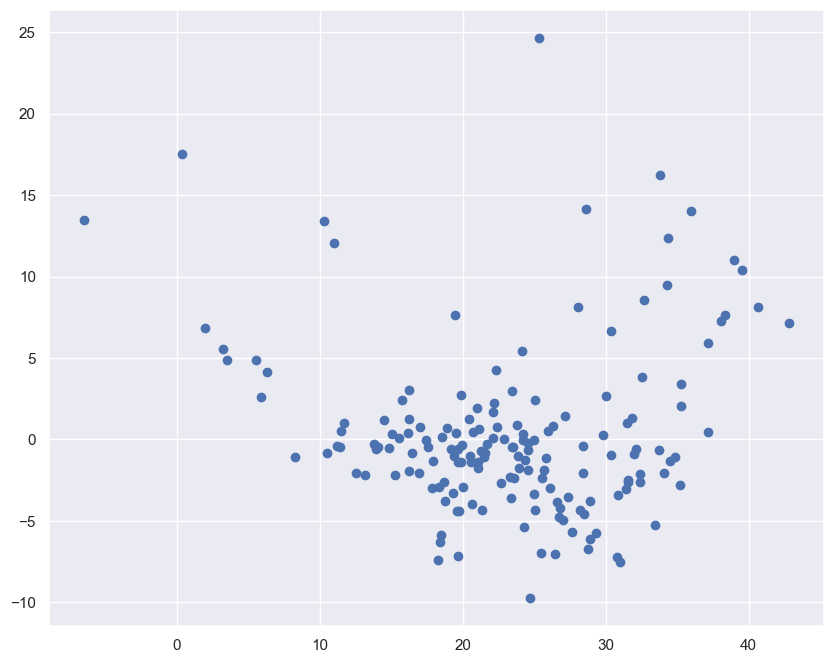

In [49]:
##Assumption with predicted and Residuals
#Uniform Distribution 
plt.figure(figsize=(10,8))
plt.scatter(reg_predict , Residuals) #There is no  shape  it is an uniform Distribution Model is Good till now.

In [54]:
#Performance Metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MAE = ",mean_absolute_error(y_test,reg_predict))
print("MSE = ",mean_squared_error(y_test,reg_predict))
print(np.sqrt(mean_squared_error(y_test,reg_predict)))      

MAE =  3.5206585298797903
MSE =  27.10099170996249
5.205861284164465


In [61]:
#R Square and Adjusted R square 
from sklearn.metrics import r2_score
print("R_square =" ,r2_score(y_test,reg_predict))
R_Square=r2_score(y_test,reg_predict)


R_square = 0.7165219393967555


In [63]:
Adj_R_Sqaure=1 -(1-R_Square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [66]:
print("Adj_R_Sqaure =" ,Adj_R_Sqaure)

Adj_R_Sqaure = 0.6924355682343882


# Assumption with Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [73]:
ridge.fit(x_train,y_train)


Ridge()

In [88]:
ridge_predict=ridge.predict(x_test)

In [89]:
y_test.shape

(167,)

In [90]:
ridge_predict.shape

(167,)

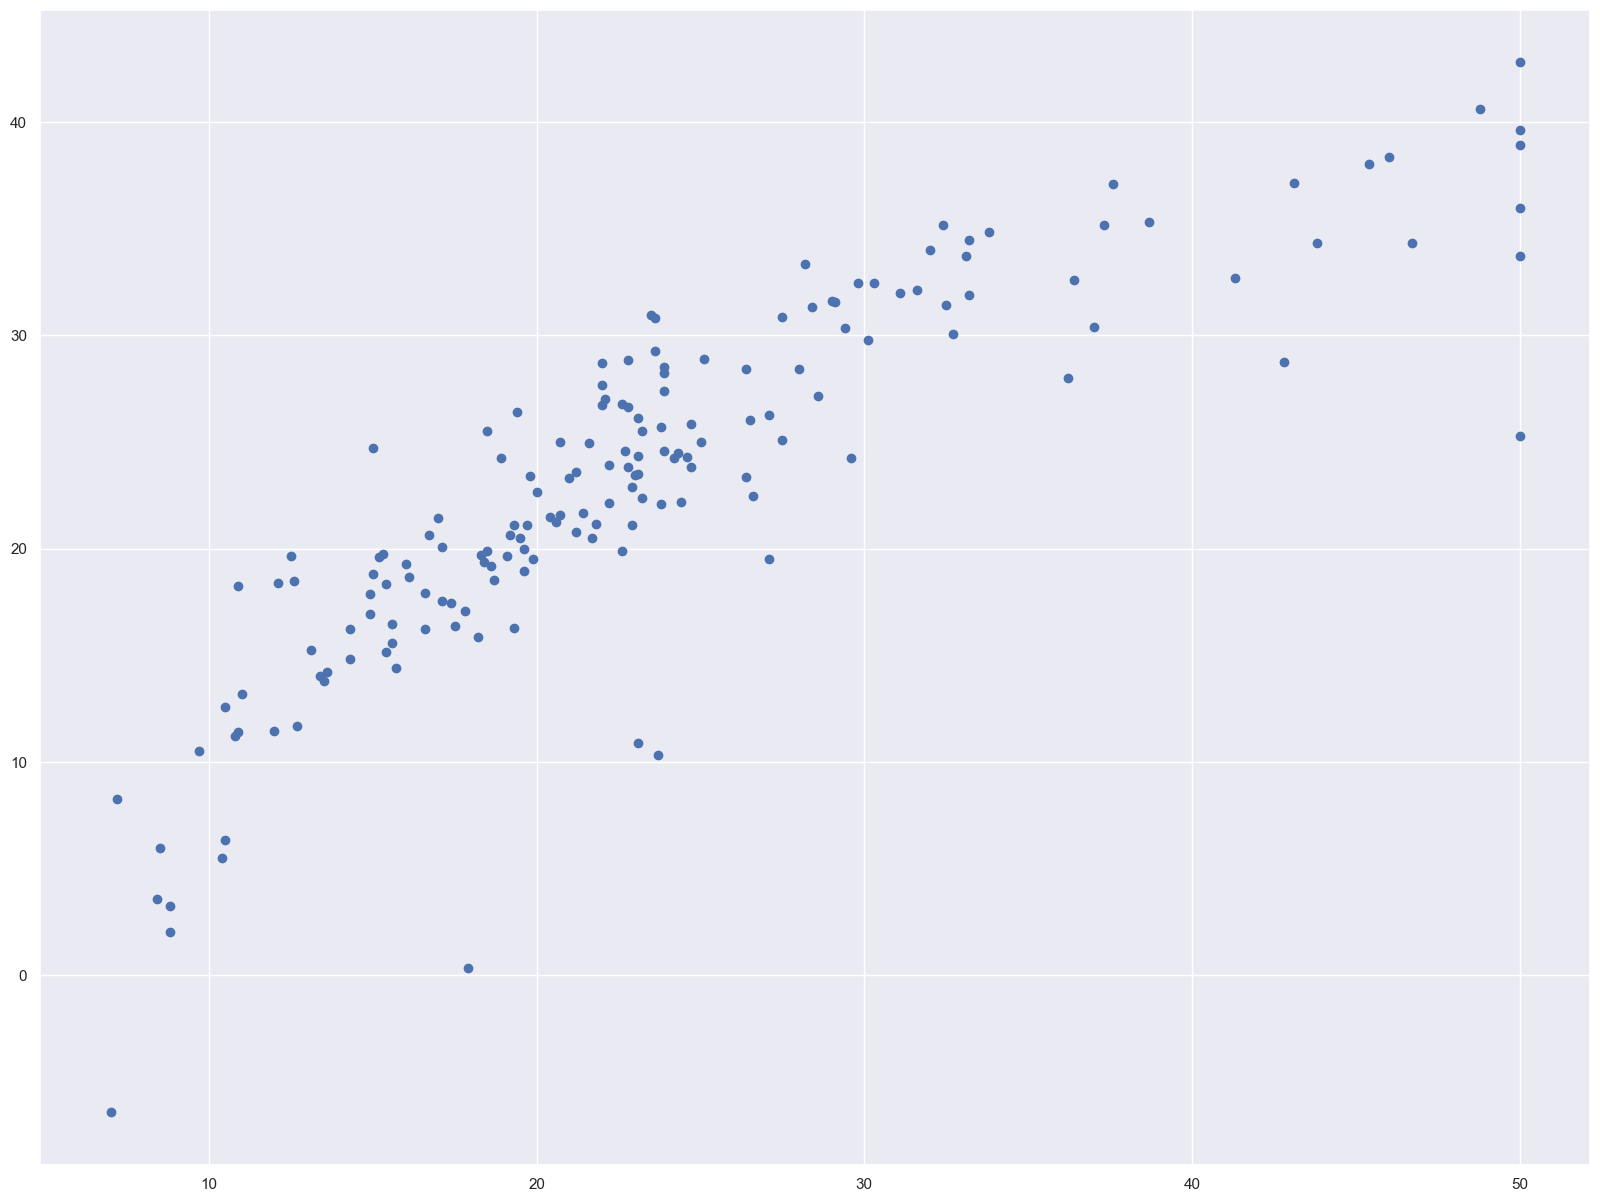

In [91]:
plt.scatter(y_test,ridge_predict)

In [92]:
Residuals_Ridge=y_test -ridge_predict

In [93]:
Residuals_Ridge

305   -2.929516
193   -0.881807
65    -7.465240
349    4.148877
151    0.668281
         ...   
442   -0.994515
451   -4.392072
188   -2.629490
76    -2.670984
314   -1.883764
Name: Price, Length: 167, dtype: float64

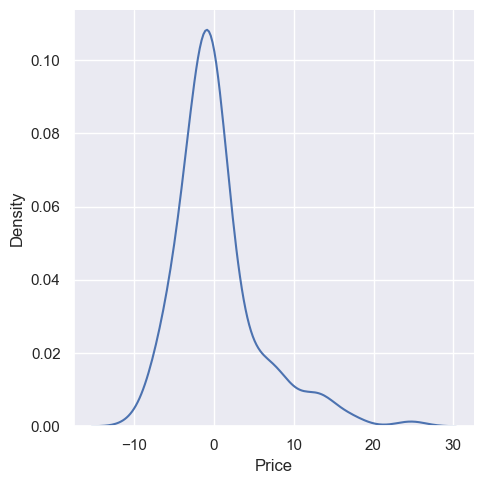

In [95]:
sns.displot(Residuals_Ridge,kind="kde")

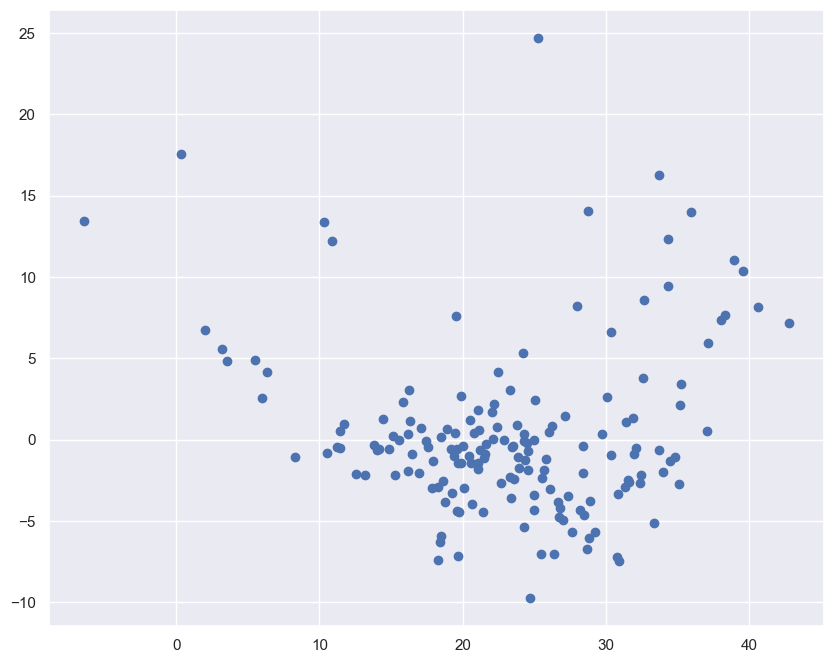

In [97]:
plt.figure(figsize=(10,8))
plt.scatter(ridge_predict,Residuals_Ridge)

In [101]:
MAE_Ridge=mean_absolute_error(y_test,ridge_predict)
MSE_Ridge=mean_squared_error(y_test,ridge_predict)
RMSE_Ridge=np.sqrt(MSE)
print("Ridge_MAE=",MAE_Ridge)
print("Ridge_MSE=",MSE_Ridge)
print("Ridge_RMSE=",RMSE_Ridge)

Ridge_MAE= 3.5161044263484267
Ridge_MSE= 27.07649000144063
Ridge_RMSE= 5.203507471066091


In [102]:
print("R_square_Ridge =" ,r2_score(y_test,ridge_predict))
R_Square_Ridge=r2_score(y_test,ridge_predict)
Adj_R_Sqaure_Ridge=1 -(1-R_Square_Ridge)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj_Ridge=",Adj_R_Sqaure_Ridge)

R_square_Ridge = 0.7167782287933788
Adj_Ridge= 0.6927136338542541


In [ ]:
A